Load all the important packages 

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

Import the dataset

In [186]:
dataset = pd.read_csv('Desktop/168/ML Data Scientist Case Study Data.csv', ';')

# Explanatory Data Analysis

Lets have a glance at the dataset

In [152]:
dataset.count()
dataset.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
0,988681,L6,Monday,17,1,2111,31672;0,6,7037,\N
1,988680,L2,Thursday,22,10,2113,31965;0,2,49,14
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2,3


In [153]:
dataset.describe()


,row_num,hour_of_day,agent_id,entry_page,traffic_type
count,988681.000000,988681.000000,988681.000000,988681.000000,988681.000000
mean,494341.000000,13.203988,7.350779,2253.265114,2.773766
std,285407.765082,6.718056,3.869630,775.083390,1.920976
min,1.000000,0.000000,0.000000,2100.000000,1.000000
25%,247171.000000,8.000000,6.000000,2111.000000,1.000000
50%,494341.000000,14.000000,9.000000,2113.000000,2.000000
75%,741511.000000,19.000000,10.000000,2116.000000,4.000000
max,988681.000000,23.000000,15.000000,8101.000000,10.000000


In [129]:
dataset.groupby('hits').mean()


,row_num,hour_of_day,agent_id,entry_page,traffic_type
hits,,,,,
1,492415.074402,12.977945,8.169055,3834.361662,2.825329
10,496352.310931,13.211763,7.410448,2172.656549,2.148402
100,508494.890977,12.830827,7.612782,2202.368421,1.601504
1000,475282.000000,22.000000,7.000000,2100.000000,1.000000
1008,340576.000000,21.000000,9.000000,2113.000000,2.000000
1009,745963.000000,18.000000,9.000000,2100.000000,1.000000
101,501111.726908,12.726908,7.184739,2207.024096,1.702811
102,488214.683128,12.954733,7.370370,2213.802469,1.687243
1027,244225.000000,13.000000,2.000000,2100.000000,1.000000


In [187]:
print(list(dataset.columns))
dataset.info()
dataset.shape
dataset.isnull().any()

['row_num', 'locale', 'day_of_week', 'hour_of_day', 'agent_id', 'entry_page', 'path_id_set', 'traffic_type', 'session_durantion', 'hits']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988681 entries, 0 to 988680
Data columns (total 10 columns):
row_num              988681 non-null int64
locale               988681 non-null object
day_of_week          988681 non-null object
hour_of_day          988681 non-null int64
agent_id             988681 non-null int64
entry_page           988681 non-null int64
path_id_set          983792 non-null object
traffic_type         988681 non-null int64
session_durantion    988681 non-null object
hits                 988681 non-null object
dtypes: int64(5), object(5)
memory usage: 75.4+ MB


row_num              False
locale               False
day_of_week          False
hour_of_day          False
agent_id             False
entry_page           False
path_id_set           True
traffic_type         False
session_durantion    False
hits                 False
dtype: bool

We need to transform continuous features that are strings into numeric.

In [188]:
dataset['hits'] = pd.to_numeric(dataset['hits'], errors = 'coerce')
dataset['session_durantion'] = pd.to_numeric(dataset['session_durantion'], errors = 'coerce')

Heat Map

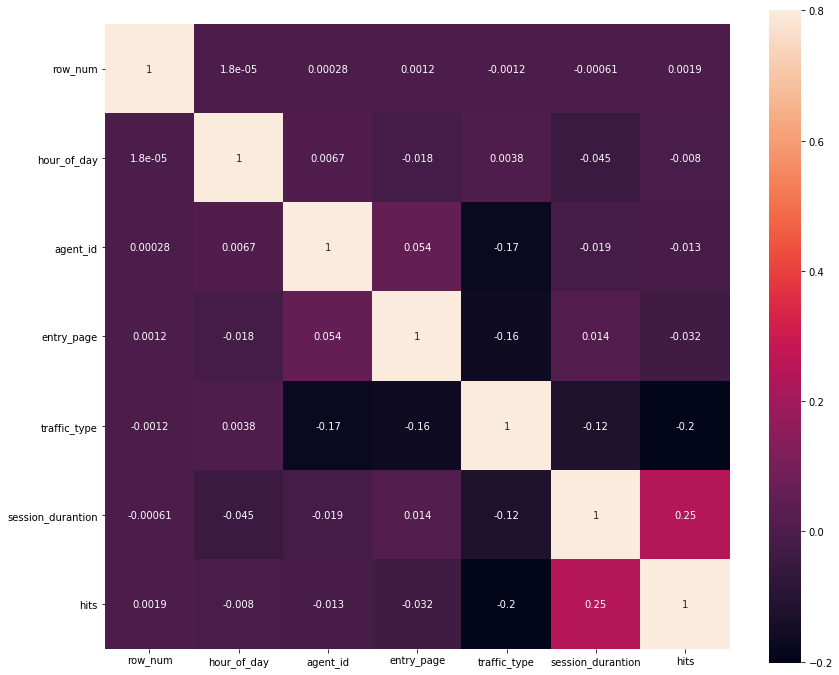

In [189]:
import seaborn as sns

heat_map = dataset.iloc[:,:]
plt.figure(figsize=(14,12))
sns.heatmap(heat_map.corr(), vmax=0.8, square=True, annot=True)
plt.show()

 And now let's take a look at the distribution of the data based on the average of the target feature.

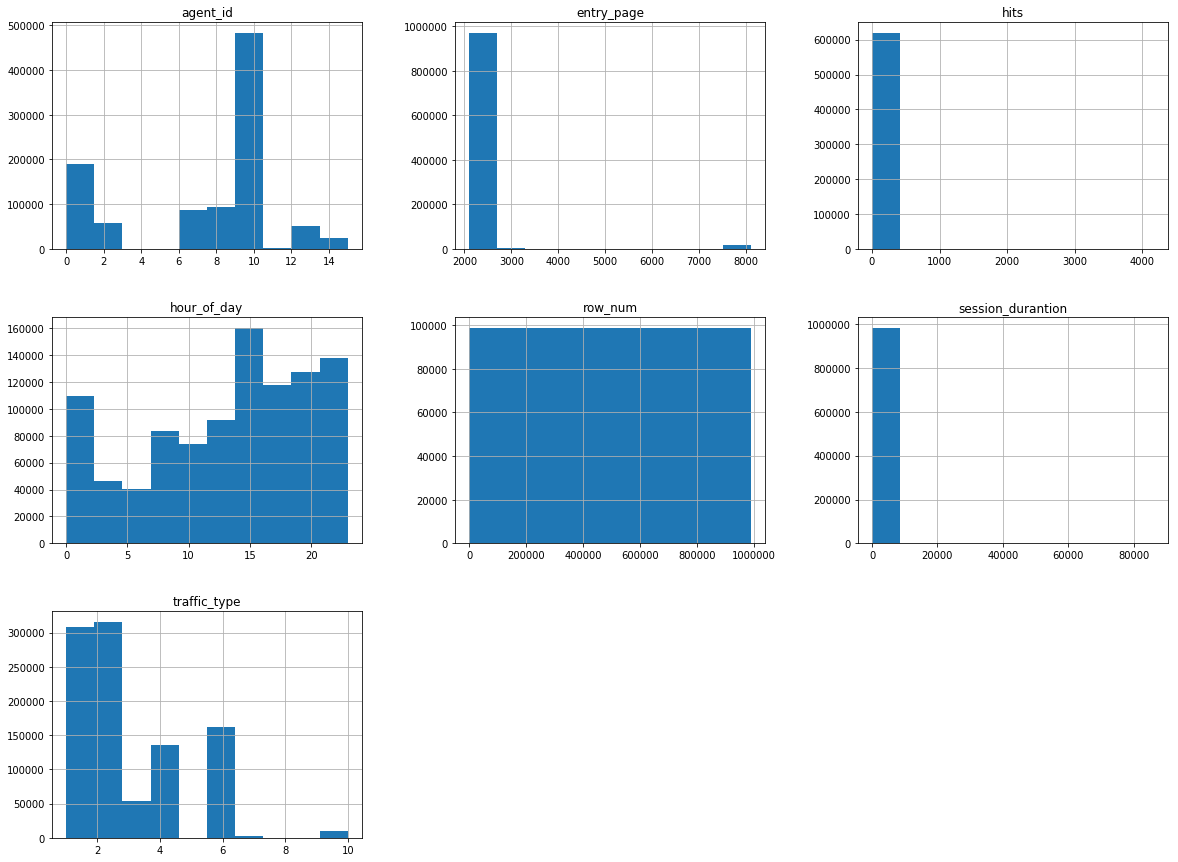

In [190]:
num_bins = 10
dataset.hist(bins=num_bins, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

Few important observations -

Agentid - 10 is getting more hits than rest.

hour_of_day - It seems we are getting more hits from 14 to 23.

Traffic_type - 1,2, 6 are getting 80% of the hits.


And now let's take a look at the distribution of the data based on the average of the target feature.

create function to exhibit bar plot


In [191]:
def plot_bar_x(df, feature, ylabel = 'Average hits'):
    plt.bar(df.index, df)
    plt.ylabel(ylabel, fontsize = 10)
    plt.xticks(df.index, df.index, fontsize = 10, rotation = 30)
    plt.title('Feature: ' + feature)
    plt.show()

Session Duration

Dividing the session_duration into multiple time intevals.

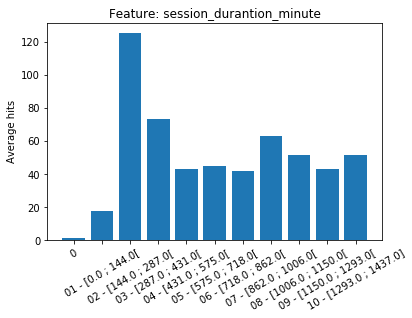

In [192]:
dataset['session_durantion_minute'] = dataset['session_durantion']/60

session_duration_min = dataset['session_durantion_minute'].min()
session_duration_max = dataset['session_durantion_minute'].max()
interval = (session_duration_max - session_duration_min)/10
session_duration_column = dataset['session_durantion_minute']

conditions = [
    (session_duration_column >= session_duration_min) & (session_duration_column < session_duration_min + interval),
    (session_duration_column >= session_duration_min + interval) & (session_duration_column < session_duration_min + 2*interval),
    (session_duration_column >= session_duration_min + 2*interval) & (session_duration_column < session_duration_min + 3*interval),
    (session_duration_column >= session_duration_min + 3*interval) & (session_duration_column < session_duration_min + 4*interval),
    (session_duration_column >= session_duration_min + 4*interval) & (session_duration_column < session_duration_min + 5*interval),
    (session_duration_column >= session_duration_min + 5*interval) & (session_duration_column < session_duration_min + 6*interval),
    (session_duration_column >= session_duration_min + 6*interval) & (session_duration_column < session_duration_min + 7*interval),
    (session_duration_column >= session_duration_min + 7*interval) & (session_duration_column < session_duration_min + 8*interval),
    (session_duration_column >= session_duration_min + 8*interval) & (session_duration_column < session_duration_min + 9*interval),
    (session_duration_column >= session_duration_min + 9*interval) & (session_duration_column <= session_duration_max)
]
choices = [
    '01 - [' + str(round(session_duration_min + 0*interval)) + ' ; ' + str(round(session_duration_min + 1*interval)) + '[',
    '02 - [' + str(round(session_duration_min + 1*interval)) + ' ; ' + str(round(session_duration_min + 2*interval)) + '[',
    '03 - [' + str(round(session_duration_min + 2*interval)) + ' ; ' + str(round(session_duration_min + 3*interval)) + '[',
    '04 - [' + str(round(session_duration_min + 3*interval)) + ' ; ' + str(round(session_duration_min + 4*interval)) + '[',
    '05 - [' + str(round(session_duration_min + 4*interval)) + ' ; ' + str(round(session_duration_min + 5*interval)) + '[',
    '06 - [' + str(round(session_duration_min + 5*interval)) + ' ; ' + str(round(session_duration_min + 6*interval)) + '[',
    '07 - [' + str(round(session_duration_min + 6*interval)) + ' ; ' + str(round(session_duration_min + 7*interval)) + '[',
    '08 - [' + str(round(session_duration_min + 7*interval)) + ' ; ' + str(round(session_duration_min + 8*interval)) + '[',
    '09 - [' + str(round(session_duration_min + 8*interval)) + ' ; ' + str(round(session_duration_min + 9*interval)) + '[',
    '10 - [' + str(round(session_duration_min + 9*interval)) + ' ; ' + str(round(session_duration_min + 10*interval)) + ']'
]

dataset['session_durantion_minute_band'] = np.select(conditions, choices)

plot_bar_x(dataset.groupby(['session_durantion_minute_band'])['hits'].mean(), 'session_durantion_minute')

* 'session_durantion_minute' between 0 and 144 minutes has a high average of hits


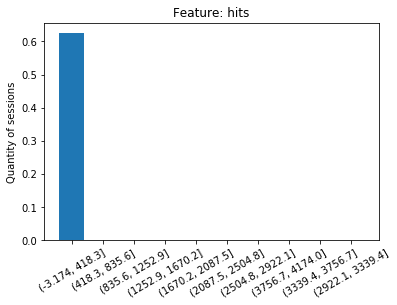

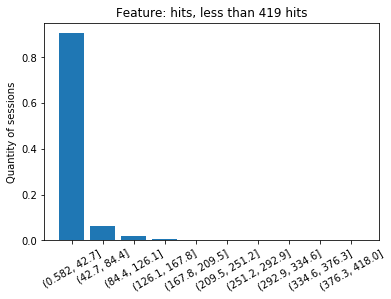

In [193]:
# hits
temp = dataset['hits'].value_counts(normalize = True, bins = 10)
temp.index = temp.index.to_series().astype(str)
plot_bar_x(temp, 'hits', 'Quantity of sessions')

temp = dataset['hits'].loc[dataset['hits'] < 419].value_counts(normalize = True, bins = 10)
temp.index = temp.index.to_series().astype(str)
plot_bar_x(temp, 'hits, less than 419 hits', 'Quantity of sessions')

Most sessions are concentrated on the band of 0 to 42 hits


Created new feature named as path_length.

path_length (continuous): count how many paths id were visited from 'path_id_set'

In [194]:
dataset['path_length'] = dataset['path_id_set'].apply(lambda x: len(re.sub('[0-9]', '', str(x))) + 1)
dataset.columns.values

array(['row_num', 'locale', 'day_of_week', 'hour_of_day', 'agent_id',
       'entry_page', 'path_id_set', 'traffic_type', 'session_durantion',
       'hits', 'session_durantion_minute',
       'session_durantion_minute_band', 'path_length'], dtype=object)

We have to transform discrete features on binaries (one new column for each category of the feature)

Expand these two columns- 

Locale

Day_of_week


In [195]:
cat_vars=['locale','day_of_week']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataset[var], prefix=var)
    hr1=dataset.join(cat_list)
    dataset=hr1

Drop the originals columns- locale and day_of_week

In [196]:
dataset.drop(dataset.columns[[1,2]], axis=1, inplace=True)
dataset.columns.values
dataset.head()

,row_num,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,session_durantion_minute,session_durantion_minute_band,...,locale_L4,locale_L5,locale_L6,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,988681,17,1,2111,31672;0,6,7037.0,NaN,117.283333,01 - [0.0 ; 144.0[,...,0,0,1,0,1,0,0,0,0,0
1,988680,22,10,2113,31965;0,2,49.0,14.0,0.816667,01 - [0.0 ; 144.0[,...,0,0,0,0,0,0,0,1,0,0
2,988679,21,2,2100,0;78464,1,1892.0,14.0,31.533333,01 - [0.0 ; 144.0[,...,1,0,0,0,0,1,0,0,0,0
3,988678,19,8,2113,51462,6,0.0,1.0,0.000000,01 - [0.0 ; 144.0[,...,0,0,0,0,0,1,0,0,0,0
4,988677,6,10,2116,31931;0,1,2.0,3.0,0.033333,01 - [0.0 ; 144.0[,...,0,0,0,0,0,0,0,0,1,0


In [197]:
dataset.columns.values

array(['row_num', 'hour_of_day', 'agent_id', 'entry_page', 'path_id_set',
       'traffic_type', 'session_durantion', 'hits',
       'session_durantion_minute', 'session_durantion_minute_band',
       'path_length', 'locale_L1', 'locale_L2', 'locale_L3', 'locale_L4',
       'locale_L5', 'locale_L6', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'], dtype=object)

we have to replace NaN for zero

In [198]:
dataset['session_durantion_minute'] = np.nan_to_num(dataset['session_durantion_minute'])

dataset.head()

,row_num,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,session_durantion_minute,session_durantion_minute_band,...,locale_L4,locale_L5,locale_L6,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,988681,17,1,2111,31672;0,6,7037.0,NaN,117.283333,01 - [0.0 ; 144.0[,...,0,0,1,0,1,0,0,0,0,0
1,988680,22,10,2113,31965;0,2,49.0,14.0,0.816667,01 - [0.0 ; 144.0[,...,0,0,0,0,0,0,0,1,0,0
2,988679,21,2,2100,0;78464,1,1892.0,14.0,31.533333,01 - [0.0 ; 144.0[,...,1,0,0,0,0,1,0,0,0,0
3,988678,19,8,2113,51462,6,0.0,1.0,0.000000,01 - [0.0 ; 144.0[,...,0,0,0,0,0,1,0,0,0,0
4,988677,6,10,2116,31931;0,1,2.0,3.0,0.033333,01 - [0.0 ; 144.0[,...,0,0,0,0,0,0,0,0,1,0


Now that we have analyzed all features from the dataset and created a few others, we will divide the dataset into three datasets, and they are:

result_dataset (all the observations that were null on the 'hits' feature)

training_dataset (90% from the remaining observations)

test_dataset (10% from the remaining observations)

I've used 80/20 for the training and test datasets because I'll use k-fold methodology to evaluate the models performance on the 'validation' dataset.

In [209]:
result_dataset = dataset.loc[dataset['hits'].isnull()]

training_dataset, test_dataset = train_test_split(dataset.loc[~dataset['hits'].isnull()],
                                                  test_size = 0.2,
                                                  random_state = 7)

Number of observations for each dataset

In [210]:
print('Result dataset: ' + str(result_dataset.shape[0]))
print('Training dataset: ' + str(training_dataset.shape[0]))
print('Test dataset: ' + str(test_dataset.shape[0]))

Result dataset: 369446
Training dataset: 495388
Test dataset: 123847


# Modeling

As our response feature is continuous we will have to use some regression models to predict the response, we'll use:

linear regression

random forest

gradient boosting


To evaluate the final model performance we will use the root mean square error (RMSE) as shown below.

To create these models we'll use:

A sample from the training_dataset (10%) for processing time

select the continuous features ('session_durantion_minute', 'path_length') and the new binary features that we created from the discrete ones ('locale', 'day_of_week')

In [211]:
allColumns = list(training_dataset.columns.values)

for i in range(0, len(allColumns) -1):
    print(str(i) + ' ' + allColumns[i])

0 row_num
1 hour_of_day
2 agent_id
3 entry_page
4 path_id_set
5 traffic_type
6 session_durantion
7 hits
8 session_durantion_minute
9 session_durantion_minute_band
10 path_length
11 locale_L1
12 locale_L2
13 locale_L3
14 locale_L4
15 locale_L5
16 locale_L6
17 day_of_week_Friday
18 day_of_week_Monday
19 day_of_week_Saturday
20 day_of_week_Sunday
21 day_of_week_Thursday
22 day_of_week_Tuesday


In [212]:
training_dataset.iloc[0:55731, np.r_[7:9, 10:22]].head()

,hits,session_durantion_minute,path_length,locale_L1,locale_L2,locale_L3,locale_L4,locale_L5,locale_L6,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday
671888,4.0,0.033333,2,0,1,0,0,0,0,0,0,0,0,0
797506,9.0,1.800000,2,0,1,0,0,0,0,1,0,0,0,0
134128,12.0,3.016667,2,0,0,0,0,0,1,0,1,0,0,0
269241,1.0,0.000000,1,0,0,0,1,0,0,0,1,0,0,0
703933,5.0,0.266667,2,0,0,0,1,0,0,1,0,0,0,0


In [213]:
array = training_dataset.iloc[0:55731, np.r_[7:9, 10:22]].values

X = array[:, 1:15]
Y = array[:, 0]

C:\Users\manjeet.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


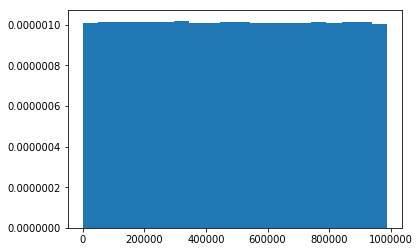

In [214]:
target = training_dataset.iloc[:,0]
his = plt.hist(target, normed=True, bins=20)

C:\Users\manjeet.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


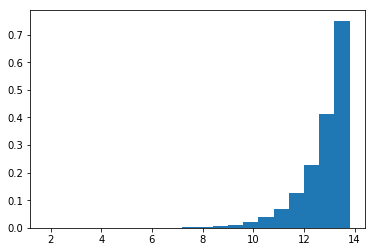

In [215]:
log_target = np.log(target)
his_log = plt.hist(log_target, normed=True, bins=20)

Linear Regression 2018-10-17 16:47:51.818295
Random Forest 2018-10-17 16:47:52.973336
Gradient Boosting 2018-10-17 16:48:04.485657
The End - 2018-10-17 16:48:47.199883


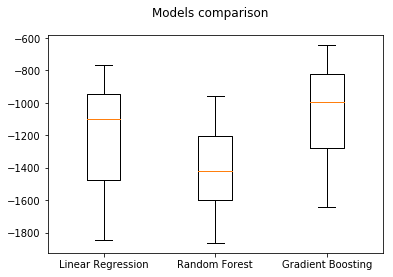

In [216]:
seed = 7

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

# evaluate all the models
results = []
names = []
scoring = 'neg_mean_squared_error'

for model_name, model in models:
    print(model_name + ' ' + str(datetime.datetime.now()))
    kfold = model_selection.KFold(n_splits = 10,
                                  random_state = seed)    
    cv_results = model_selection.cross_val_score(model, X, Y,
                                                 cv = kfold,
                                                 scoring = scoring)    
    results.append(cv_results)
    names.append(model_name)

print('The End - ' + str(datetime.datetime.now()))

# boxplot models comparison

fig = plt.figure()
fig.suptitle('Models comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on the comparison between these four models, the best performance achieved was from the Gradient Boosting algorithm. So, let's apply it and take a look deeper on the model parameters below.

max_depth

learning_rate

n_estimators

min_samples_leaf

After varying the parameters and doing a cross-validation k-fold (k equals 10) we end up with the model below.

In [218]:
model = GradientBoostingRegressor(criterion = 'friedman_mse',
                                 max_depth = 3,
                                 learning_rate = 0.05,
                                 n_estimators = 100,
                                 min_samples_leaf = 1,
                                 random_state = 7)

kfold = model_selection.KFold(n_splits = 10,
                              random_state = 7)

from sklearn.metrics import mean_squared_error
from math import sqrt




Lets fit it on the training_dataset and apply on the test_dataset to see how it performs.

In [219]:
model.fit(X, Y)

array = test_dataset.iloc[:,np.r_[7:9, 10:22]].values

X_test = array[:, 1:15]
Y_test = array[:, 0]

Y_pred = model.predict(X)
Y_test_pred = model.predict(X_test)
#rms = sqrt(mean_squared_error(Y, Y_pred))
#print("Root Mean Squared Error: %.2f" % rms)

meanSquaredError=mean_squared_error(Y, Y_pred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

#print("Mean Squared Error (training): %.2f" % sqrt(mean_squared_error(Y, Y_pred)))
#print("Mean Squared Error (test): %.2f" % sqrt(mean_squared_error(Y_test, Y_test_pred)))

MSE: 929.194384830715
RMSE: 30.482689921178462


It seems that the model's performance on the training_dataset and on the test_dataset are very close to each other what indicates that it may probably fit well on the "production" environment, in that manner, on the result_dataset too.

# Evaluation

By last, we will use the model from the last section to predict the hits on the 'result_dataset' and save as a csv file.

In [220]:
array = result_dataset.iloc[:, np.r_[7:9, 10:22]].values

X_result = array[:, 1:15]
Y_result = model.predict(X_result)

result = pd.concat([pd.DataFrame(result_dataset['row_num']).reset_index(drop = True),
                    pd.DataFrame(Y_result).reset_index(drop = True)],
                   axis = 1)

result.columns = ['row_num', 'hits']

result.head()

,row_num,hits
0,988681,61.254145
1,988666,69.527378
2,988665,3.951948
3,988664,101.042493
4,988663,20.306942


In [221]:
print(result.shape[0])

369446


# Output file

In [222]:
result.to_csv(path_or_buf = 'desktop/168/result.csv', sep = ';', index = False)